In [1]:
#General imports
import numpy as np

#Operator Imports
from qiskit.opflow import Z, X, I, StateFn, CircuitStateFn, SummedOp, CircuitOp
from qiskit.opflow.gradients import Gradient, NaturalGradient, QFI, Hessian

#Circuit imports
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter, ParameterVector, ParameterExpression
from qiskit.circuit.library import EfficientSU2


from qiskit import Aer
from qiskit_machine_learning.neural_networks import  CircuitQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit.utils import QuantumInstance

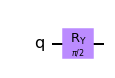

In [9]:
circuit = QuantumCircuit(1)
circuit.ry(Parameter('i_0'), 0)
circuit.ry(Parameter('w_0'), 0)
circuit.draw('mpl')

In [39]:
circuit = QuantumCircuit(2)
circuit.ry(Parameter('i0'),0)
circuit.ry(Parameter('i1'),1)
circuit.ry(Parameter('w0'),0)
circuit.cry(Parameter('w01'),0,1)
circuit.ry(Parameter('w1'),1)
circuit.cry(Parameter('w10'),1,0)

circuit.draw()

┌────────┐┌────────┐                     ┌─────────┐
q_0: ┤ Ry(i0) ├┤ Ry(w0) ├─────■───────────────┤ Ry(w10) ├
     ├────────┤└────────┘┌────┴────┐┌────────┐└────┬────┘
q_1: ┤ Ry(i1) ├──────────┤ Ry(w01) ├┤ Ry(w1) ├─────■─────
     └────────┘          └─────────┘└────────┘

In [55]:
circuit.decompose().decompose().decompose().draw()

┌───────────┐  ┌───────────┐                                »
q_0: ┤ U(i0,0,0) ├──┤ U(w0,0,0) ├────■────────────────────────■──»
     ├───────────┤┌─┴───────────┴─┐┌─┴─┐┌──────────────────┐┌─┴─┐»
q_1: ┤ U(i1,0,0) ├┤ U3(w01/2,0,0) ├┤ X ├┤ U3(-0.5*w01,0,0) ├┤ X ├»
     └───────────┘└───────────────┘└───┘└──────────────────┘└───┘»
«     ┌───────────────┐┌───┐┌──────────────────┐┌───┐
«q_0: ┤ U3(w10/2,0,0) ├┤ X ├┤ U3(-0.5*w10,0,0) ├┤ X ├
«     └─┬───────────┬─┘└─┬─┘└──────────────────┘└─┬─┘
«q_1: ──┤ U(w1,0,0) ├────■────────────────────────■──
«       └───────────┘

In [48]:
op = CircuitOp(circuit)
print(op)

     ┌────────┐┌────────┐                     ┌─────────┐
q_0: ┤ Ry(i0) ├┤ Ry(w0) ├─────■───────────────┤ Ry(w10) ├
     ├────────┤└────────┘┌────┴────┐┌────────┐└────┬────┘
q_1: ┤ Ry(i1) ├──────────┤ Ry(w01) ├┤ Ry(w1) ├─────■─────
     └────────┘          └─────────┘└────────┘           


In [44]:
grad = Gradient().convert(operator = StateFn(op), params = circuit.parameters)
print(grad.assign_parameters([-1,1,1,-1,1,-1]))

AttributeError: 'NoneType' object has no attribute 'assign_parameters'